# Simple Nueral Network

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import itertools
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf

In [25]:
df = pd.read_csv('finalDF.csv',index_col=0)
df = df.drop(columns=['glucose','diagnosis_tokenized'])
display(df)


,hadm_id,subject_id,expire_flag,diagnosis,admission_type,age,admission_type_encoded,0,1,2,...,4,5,6,7,8,9,a,b,c,d
0,137275,9319,0,LEFT RENAL CA/SDA,ELECTIVE,82,0,118.0,97.0,97.0,...,90.0,88.0,93.0,93.0,109.0,109.0,26,24.0,85.0,4.0
1,125380,31585,0,PNEUMONIA,EMERGENCY,300,1,118.0,127.0,113.0,...,113.0,113.0,113.0,127.0,127.0,127.0,13,0.0,0.0,0.0
2,132722,1426,0,LEFT FRONTAL HEMORRHAGE,EMERGENCY,80,1,104.0,104.0,205.0,...,154.0,154.0,165.0,165.0,172.0,0.0,26,32.0,0.0,0.0
3,101422,71582,0,AORTIC STENOSIS,EMERGENCY,76,1,106.0,134.0,132.0,...,92.0,106.0,115.0,114.0,159.0,161.0,17,23.0,0.0,0.0
4,139687,68501,0,CAROTID STENOSIS/SDA,ELECTIVE,86,0,162.0,180.0,121.0,...,251.0,0.0,0.0,0.0,0.0,0.0,67,23.0,4.0,0.0
5,148291,9299,0,HEMOPTYSIS,EMERGENCY,62,1,222.0,128.0,116.0,...,101.0,188.0,120.0,106.0,106.0,97.0,-1,0.0,0.0,0.0
6,116534,46467,0,AORTIC STENOSIS\AORTIC VALVE REPLACEMENT /SDA,ELECTIVE,82,0,235.0,235.0,195.0,...,222.0,116.0,78.0,84.0,99.0,76.0,17,23.0,17.0,33.0
7,193449,60763,0,LIKELY THROMBOCYTOPENIA,EMERGENCY,38,1,102.0,115.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.0,0.0
8,133497,20374,0,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,ELECTIVE,56,0,89.0,89.0,87.0,...,89.0,89.0,74.0,74.0,87.0,93.0,1,2.0,3.0,1.0
9,184844,29851,0,UPPER GASTROINTESTINAL BLEED,EMERGENCY,300,1,122.0,152.0,133.0,...,119.0,254.0,241.0,241.0,270.0,278.0,37,28.0,7.0,0.0


In [26]:
print(len(df[df.expire_flag == 0]))
print(len(df[df.expire_flag == 1]))

12217
1443


In [27]:
overfitting = df.loc[df['expire_flag'] == 1]

df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)
df = df.append(overfitting,ignore_index=True)

In [28]:
print(len(df))

25204


In [29]:
features = df.drop(columns=['hadm_id','subject_id','expire_flag',
                            'diagnosis','admission_type'])
pydf = df.values
print(pydf.shape)
X = pydf[:,5:470]
y = pydf[:,2]
print(X)
print(y)

(25204, 21)
[[82 0 118.0 ... 24.0 85.0 4.0]
 [300 1 118.0 ... 0.0 0.0 0.0]
 [80 1 104.0 ... 32.0 0.0 0.0]
 ...
 [75 1 255.0 ... 0.0 0.0 0.0]
 [72 1 185.0 ... 0.0 0.0 0.0]
 [63 1 108.0 ... 61.0 0.0 0.0]]
[0 0 0 ... 1 1 1]


In [30]:
print(X.shape)

(25204, 16)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Modeling with a Simple Neural Network

In [34]:
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',auc_roc])
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))

Epoch 1/150
18903/18903 [==============================] - 2s 101us/step - loss: 1.1000 - acc: 0.4925 - auc_roc: 0.4733
Epoch 2/150
18903/18903 [==============================] - 1s 72us/step - loss: 0.6950 - acc: 0.5183 - auc_roc: 0.4955
Epoch 3/150
18903/18903 [==============================] - 1s 73us/step - loss: 0.6905 - acc: 0.5200 - auc_roc: 0.5036
Epoch 4/150
18903/18903 [==============================] - 1s 72us/step - loss: 0.6867 - acc: 0.5201 - auc_roc: 0.5095
Epoch 5/150
18903/18903 [==============================] - 1s 72us/step - loss: 0.6833 - acc: 0.5294 - auc_roc: 0.5160
Epoch 6/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6795 - acc: 0.5302 - auc_roc: 0.5240
Epoch 7/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6772 - acc: 0.5377 - auc_roc: 0.5306
Epoch 8/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6740 - acc: 0.5462 - auc_roc: 0.5361
Epoch 9/150
18903/18903 [======================

18903/18903 [==============================] - 1s 71us/step - loss: 0.6440 - acc: 0.6006 - auc_roc: 0.6222
Epoch 70/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6434 - acc: 0.5995 - auc_roc: 0.6226
Epoch 71/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6422 - acc: 0.6005 - auc_roc: 0.6230
Epoch 72/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6441 - acc: 0.5967 - auc_roc: 0.6234
Epoch 73/150
18903/18903 [==============================] - 1s 70us/step - loss: 0.6440 - acc: 0.5982 - auc_roc: 0.6237
Epoch 74/150
18903/18903 [==============================] - 1s 70us/step - loss: 0.6441 - acc: 0.5970 - auc_roc: 0.6240
Epoch 75/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6427 - acc: 0.6014 - auc_roc: 0.6243
Epoch 76/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6441 - acc: 0.5969 - auc_roc: 0.6247
Epoch 77/150
18903/18903 [===========================

18903/18903 [==============================] - 1s 73us/step - loss: 0.6385 - acc: 0.6022 - auc_roc: 0.6363
Epoch 137/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6387 - acc: 0.6029 - auc_roc: 0.6364
Epoch 138/150
18903/18903 [==============================] - 1s 71us/step - loss: 0.6394 - acc: 0.6003 - auc_roc: 0.6366
Epoch 139/150
18903/18903 [==============================] - 1s 72us/step - loss: 0.6380 - acc: 0.6041 - auc_roc: 0.6367
Epoch 140/150
18903/18903 [==============================] - 1s 75us/step - loss: 0.6375 - acc: 0.6038 - auc_roc: 0.6368
Epoch 141/150
18903/18903 [==============================] - 1s 75us/step - loss: 0.6400 - acc: 0.6031 - auc_roc: 0.6370
Epoch 142/150
18903/18903 [==============================] - 1s 73us/step - loss: 0.6376 - acc: 0.6021 - auc_roc: 0.6370
Epoch 143/150
18903/18903 [==============================] - 1s 72us/step - loss: 0.6373 - acc: 0.6034 - auc_roc: 0.6372
Epoch 144/150
18903/18903 [===================

In [17]:
# define roc_callback, inspired by https://github.com/keras-team/keras/issues/6050#issuecomment-329996505
def auc_roc(y_true, y_pred):
    # any tensorflow metric
    value, update_op = tf.contrib.metrics.streaming_auc(y_pred, y_true)

    # find all variables created for this metric
    metric_vars = [i for i in tf.local_variables() if 'auc_roc' in i.name.split('/')[1]]

    # Add metric variables to GLOBAL_VARIABLES collection.
    # They will be initialized for new session.
    for v in metric_vars:
        tf.add_to_collection(tf.GraphKeys.GLOBAL_VARIABLES, v)

    # force to update metric values
    with tf.control_dependencies([update_op]):
        value = tf.identity(value)
        return value

### Confusion Matrix

Confusion matrix, without normalization
[[1987 1035]
 [1491 1788]]


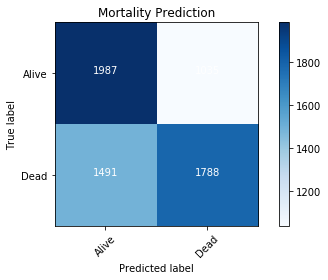

In [35]:
from sklearn.metrics import confusion_matrix 
labels = ['Alive','Dead']
y_pred = model.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.
y_pred = y_pred.reshape(-1)
y_pred = y_pred.astype(np.int64)
y_test = y_test.astype(np.int64)
#print(type(y_pred[1]))
#print(type(y_test[1]))
#print(y_test)
#print(y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,labels,title='Mortality Prediction')

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()